# Natural Language Processing - Обработка естественного языка

## Лексический анализ и TF-IDF


<br>

---
<br>

# В прошлой лекции
* Синтаксис
    * Предложение = Подлежащее + Сказуемое + Объект
* Формальные языки
    * Язык = "a+"
    * Vt (словарь терминальных символов) = {a}
    * Vn (словарь нетерминальных символов) = {S}
    * ```
      P (правила) = {
        S -> S a
        S -> a
      }
      ```
* Иерархия хомского
    * Регулярные
    * Контекстно-свободные
    * Контекстно-зависимые
    * Рекурсивно-перечислимые
* Синтаксический парсер
    * ```
    {
       "id": 1,
       "text": "Трудолюбивые",
       "lemma": "трудолюбивый",
       "upos": "ADJ",
       "feats": "Case=Nom|Degree=Pos|Number=Plur",
       "head": 2,
       "deprel": "amod",
       "start_char": 0,
       "end_char": 12,
       "ner": "S-MISC",
       "multi_ner": [
         "S-MISC"
       ]
    }
      ```
* Регулярные выражения
    * ```re.match(r"(A-Z)* abc", r"abc \1 ", s)```
* Чат-бот
    * SimpleChatBot
        * contexts
        * intents
    * сценарий
    * обработчики

<br>

---
<br>

# План на сегодня
* **Лексический анализ**
* WordNet
* Разрешение лексической многозначности
* TF-IDF
* LSA и LDA

<br>

---
<br>

# Лексический анализ

Лексический анализ — это процесс разбиения последовательности символов на значимые единицы, называемые токенами, которые затем сопоставляются с соответствующим словарем (Vocabulary) и смыслом слова (Word sense).

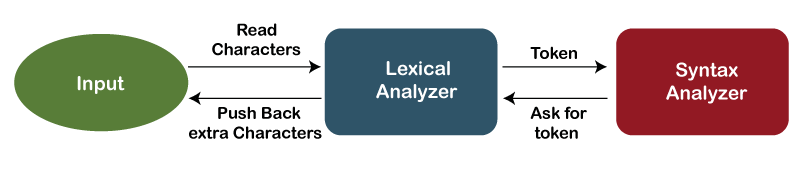

#### Сложности

* Предложения можно двояко интерпретировать
* Слова могут быть заменены на синонимы 
  * конкурент/соперник, худой/тощий, смелый/храбрый, памятник/монумент, ...
* Омонимы имеют по несколько значений 
  * замок, среда, белки, кисть, язык, ...

Как же искать нужную информацию по смыслу (семантике), а не конкретным словам (лексике)?


---
<br>

#### Загадка

Без нее дверь не открыть и письмо не настрочить.


#### Анекдот

Врач: «Как ваше состояние, больной?». 

Пациент: «Благодаря вашей заботе мое состояние сильно уменьшилось.» («состояние» как самочувствие или финансовое положение)

<br>

---

#### Как определять смыслы слов?
* словари / глоссарии / тезаурусы
  * WordNet
  * RuThes
* эмбеддинги (векторные представления)
  * TF-IDF, LSA
  * Word2vec, GloVe, fastText
  * ELMo, BERT

<br>

---
<br>

# План на сегодня
* Лексический анализ
* **WordNet**
* Разрешение лексической многозначности
* TF-IDF
* LSA и LDA

## WordNet

Тезаурус -- это машиночитаемый словарь какого-либо языка, составленный лингвистами и содержащий информацию о связях между словами.

WordNet разбит на синсеты -- наборы синонимичных слов и словосочетаний. Между синсетами установлены бинарные отношения, такие, как гипоним-гипероним, то есть "частное-общее". Например, "спаржа" является частным случаем "овощей". Такая разметка на синонимы и гиперонимы позволяет устанавливать отношения между словами с большей надёжностью (по крайней мере, в теории), чем при помощи word2vec и прочей дистрибутивной семантики.

Основными сущностями в тезаурусе являются Sense (смысл) - одно конкретное слово или словосочетание с конкретным же значением, а также Synset (синсет) - множество сущностей Sense с одинаковыми значениями и с одной частью речи.

In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet as wn

print(wn.synsets('dog'))
print(wn.synsets('dog', pos=wn.VERB))

[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]
[Synset('chase.v.01')]


In [ ]:
print(wn.synset('dog.n.01'))
print(wn.synset('dog.n.01').definition())
print(len(wn.synset('dog.n.01').examples()))
print(wn.synset('dog.n.01').examples()[0])

Synset('dog.n.01')
a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
1
the dog barked all night


In [ ]:
print(wn.synset('dog.n.01').lemmas())
print([str(lemma.name()) for lemma in wn.synset('dog.n.01').lemmas()])
print(wn.lemma('dog.n.01.dog').synset())

[Lemma('dog.n.01.dog'), Lemma('dog.n.01.domestic_dog'), Lemma('dog.n.01.Canis_familiaris')]
['dog', 'domestic_dog', 'Canis_familiaris']
Synset('dog.n.01')


In [ ]:
wn.synset("pack.n.06").definition()

'a group of hunting animals'

In [ ]:
dog = wn.synset('dog.n.01')
print(dog.hypernyms())
print(dog.hyponyms())
print(dog.member_holonyms())
print(dog.root_hypernyms())
print(wn.synset('dog.n.01').lowest_common_hypernyms(wn.synset('cat.n.01')))

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('basenji.n.01'), Synset('corgi.n.01'), Synset('cur.n.01'), Synset('dalmatian.n.02'), Synset('great_pyrenees.n.01'), Synset('griffon.n.02'), Synset('hunting_dog.n.01'), Synset('lapdog.n.01'), Synset('leonberg.n.01'), Synset('mexican_hairless.n.01'), Synset('newfoundland.n.01'), Synset('pooch.n.01'), Synset('poodle.n.01'), Synset('pug.n.01'), Synset('puppy.n.01'), Synset('spitz.n.01'), Synset('toy_dog.n.01'), Synset('working_dog.n.01')]
[Synset('canis.n.01'), Synset('pack.n.06')]
[Synset('entity.n.01')]
[Synset('carnivore.n.01')]


In [ ]:
good = wn.synset('good.a.01')
good.lemmas()[0].antonyms()

[Lemma('bad.a.01.bad')]

In [ ]:
good.lemmas()

[Lemma('good.a.01.good')]

In [ ]:
wn.synsets('often')

[Synset('frequently.r.01'), Synset('much.r.05'), Synset('often.r.03')]

In [ ]:
wn.synsets('through')
wn.synset('done.s.02').definition()

'cooked until ready to serve'

[nltk:WordNet](https://www.nltk.org/howto/wordnet.html)

## RuWordNet

In [ ]:
!pip install ruwordnet
!ruwordnet download
from IPython.display import clear_output
clear_output()

In [ ]:
from ruwordnet import RuWordNet
wn = RuWordNet()

In [ ]:
for sense in wn.get_senses('замок'):
    print(sense.synset)

Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК")
Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")


In [ ]:
wn.get_senses('спаржа')[0].synset.hypernyms

[Synset(id="348-N", title="ОВОЩИ"),
 Synset(id="4789-N", title="ТРАВЯНИСТОЕ РАСТЕНИЕ"),
 Synset(id="6878-N", title="ОВОЩНАЯ КУЛЬТУРА")]

In [ ]:
wn.get_senses('овощи')[0].synset.hyponyms

[Synset(id="144194-N", title="ТЫКВА (ПЛОД)"),
 Synset(id="153883-N", title="ЗЕЛЕНЬ (ОВОЩИ)"),
 Synset(id="144191-N", title="ПОМИДОР (ПЛОД)"),
 Synset(id="144205-N", title="ПАТИССОН (ПЛОД)"),
 Synset(id="118660-N", title="ЗЕЛЕНЫЙ ГОРОШЕК"),
 Synset(id="144182-N", title="ЛУК (РАСТЕНИЕ)"),
 Synset(id="144207-N", title="СТРУЧКОВЫЙ ПЕРЕЦ (ПЛОД)"),
 Synset(id="144181-N", title="БАКЛАЖАН (ПЛОД)"),
 Synset(id="107993-N", title="АРТИШОК"),
 Synset(id="144216-N", title="КАБАЧОК (ПЛОД)"),
 Synset(id="144183-N", title="ЧЕСНОК"),
 Synset(id="108482-N", title="СПАРЖА"),
 Synset(id="144232-N", title="КОЧАН КАПУСТЫ"),
 Synset(id="148896-N", title="КОРНЕПЛОДНЫЕ ОВОЩИ"),
 Synset(id="144184-N", title="ОГУРЕЦ (ПЛОД)")]

In [ ]:
print(wn.get_synset_by_id("134045-N"))
print(wn.get_en_synset_by_id("11493827-n"))
print(wn.get_senses('потенциал'))
print(wn.get_synsets('потенциал'))
print(wn.get_en_senses('potential'))
print(wn.get_en_synsets('potential'))

Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)")
WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts")
[Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ"), Sense(id="134046-N-189287", name="ПОТЕНЦИАЛ")]
[Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)"), Synset(id="134046-N", title="ПОТЕНЦИАЛ (РЕСУРС)")]
[WNSense(key="potential%1:19:00::", name="potential"), WNSense(key="potential%3:00:00::", name="potential"), WNSense(key="potential%1:26:00::", name="potential")]
[WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts"), WNSynset(id="00044353-a", definition="existing in possibility"), WNSynset(id="14482620-n", definition="the inherent capacity for coming into being")]


In [ ]:
print(wn['134045-N'])
print(wn['11493827-n'])
print(wn['134045-N-189287'])
print(wn['electric_potential%1:19:00::'])
print(wn['потенциал'])
print(wn['potential'])

Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)")
WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts")
Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ")
WNSense(key="electric_potential%1:19:00::", name="electric_potential")
[Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ"), Sense(id="134046-N-189287", name="ПОТЕНЦИАЛ")]
[WNSense(key="potential%1:19:00::", name="potential"), WNSense(key="potential%3:00:00::", name="potential"), WNSense(key="potential%1:26:00::", name="potential")]


[RuWordNet](https://github.com/avidale/python-ruwordnet)

<br>

---
<br>

# План на сегодня
* Лексический анализ
* WordNet
* **Разрешение лексической многозначности**
* TF-IDF
* LSA
* LDA

## Разрешение лексической многозначности

Задача разрешения лексической многозначности (Word Sense Disambiguation) заключается в определении правильного значения слова в данном контексте. 
* многие слова имеют по несколько значений, а значит слово будет нести разный смысл в разных контекстах
* нужно уметь различать смысл слова в разных контекстах

* Замок был окружен рвом.
  * "Заˈмок" - сооружение, а не "замоˈк" - запирающее устройство.
* В эту среду обитания попал недружелюбный вид насекомых.
  * "среда" - место или окружение, а не "среда" - день недели.

Для разрешения лексической многозначности слова могут быть использованы внешние источники знаний, такие как словари, тезаурусы или онтологии. Например, если слово "язык" появляется в лингвистическом контексте ("естественные языки"), его вероятное значение - средство общения, а не орган питания (как в "показал язык").

Один из таких алгоритмов - **Lesk** - использует контекст слова для определения его правильного значения. Он был разработан Майклом Леском в 1986 году и основан на идее, что слова в однои и том же контексте, как правило, имеют схожие значения.

Алгоритм работает, сравнивая определения неоднозначного слова со словами в окружающем контексте и выбирая определение, которое больше всего совпадает с контекстом. Алгоритм широко использовался в приложениях для обработки естественного языка и поиска информации, и во многих случаях показал свою эффективность. 

Однако у него есть и некоторые ограничения, такие как:
* зависимость от качества словаря
* неспособность обрабатывать идиоматические выражения или метафоры.

In [ ]:
import nltk
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

from IPython.display import clear_output
clear_output()

In [ ]:
def get_semantic(seq, key_word):
      # Tokenization of the sequence
    temp = word_tokenize(seq)
      
    # Retrieving the definition 
    # of the tokens
    temp = lesk(temp, key_word)
    return temp.definition()

In [ ]:
keyword = 'book'
seq1 = 'I love reading books on coding.'
seq2 = 'The table was already booked by someone else.'
  
print(get_semantic(seq1, keyword))
print(get_semantic(seq2, keyword))

a number of sheets (ticket or stamps etc.) bound together on one edge
arrange for and reserve (something for someone else) in advance


In [ ]:
from ruwordnet import RuWordNet
wn = RuWordNet()

In [ ]:
def rulesk(context_sentence, ambiguous_word):
    context = set(word_tokenize(context_sentence))  # можно добавить лемматизацию, можно добавлять синонимы/антонимы/гипернимы, взвешивать по IDF...
    synsets = wn.get_synsets(ambiguous_word)
    sense = max(synsets, key=lambda ss: len(context.intersection(word_tokenize(ss.definition))))
    return sense

In [ ]:
rulesk("ручка совсем перестала писать", "ручка")

Synset(id="139821-N", title="РУКОЯТКА УПРАВЛЕНИЯ")

In [ ]:
[(x.title, x.definition) for x in wn.get_synsets("ручка")]

[('РУКОЯТКА УПРАВЛЕНИЯ', ''),
 ('РУКА (КОНЕЧНОСТЬ)',
  'одна из двух верхних конечностей человека, от плеча до конца пальцев'),
 ('РУЧКА ДЛЯ ДЕРЖАНИЯ',
  'часть предмета, за которую его можно брать рукой, держать или перемещать'),
 ('РУЧКА ДЛЯ ПИСЬМА',
  'письменная принадлежность в виде удлиненного стержня, на конце которого находится перо или другое пишущее приспособление'),
 ('РУЧКА, ПОДЛОКОТНИК',
  'опора для рук (локтей) на стуле c подлокотниками или мягкой мебелиподлокотник кресла')]

In [ ]:
rulesk("не могу открыть замок ключом", "замок")

Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")

<br>

---
<br>

# План на сегодня
* Лексический анализ
* WordNet
* Разрешение лексической многозначности
* **TF-IDF**
* LSA и LDA

<br>

---
<br>

## TF-IDF

Статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса

In [ ]:
request = "The market capitalization of Tesla company"
documents = [
    "Tesla, Inc. is an American electric vehicle and clean energy company.",
    "Tesla has a market capitalization of $569.93 Billion according to our data.",
    "Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.",
    "Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.",
]

In [ ]:
for d in documents:
    score = sum(
        r == w
        for r in nltk.word_tokenize(request.lower())
        for w in nltk.word_tokenize(d.lower())
    )
    print(f"{score} - {d}")

2 - Tesla, Inc. is an American electric vehicle and clean energy company.
4 - Tesla has a market capitalization of $569.93 Billion according to our data.
4 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
8 - Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.


TF (term frequency — частота слова) — отношение числа вхождений некоторого слова к общему числу слов документа.

In [ ]:
def TF(term, doc):
    words = nltk.word_tokenize(doc)
    counts = sum(term == w for w in words)
    return counts / len(words)

for d in documents:
    score = sum(
        TF(r, d.lower())
        for r in nltk.word_tokenize(request.lower())
    )
    print(f"{score:.3f} - {d}")

0.154 - Tesla, Inc. is an American electric vehicle and clean energy company.
0.286 - Tesla has a market capitalization of $569.93 Billion according to our data.
0.211 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
0.348 - Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.


Закон Ципфа: График для частотностей слов из статей русской Википедии с рангами от 3 до 170

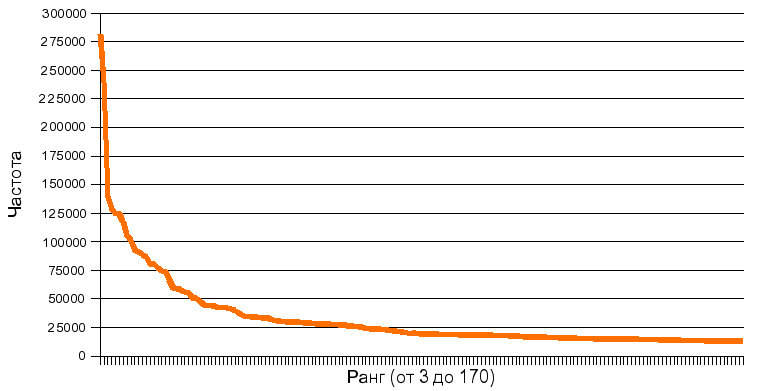

IDF (inverse document frequency — обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции.

In [ ]:
import math

from collections import Counter
from nltk.corpus import reuters


nltk.download('reuters')


def DF(term, docs):
    counts = sum(term in [w.lower() for w in reuters.words(d)] for d in docs)
    counts = counts if counts > 0 else 1
    return counts / len(docs)


files = reuters.fileids()
IDF = {
    r: math.log(1 / DF(r, files))
    for r in nltk.word_tokenize(request.lower())
}
print(IDF)

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


{'the': 0.4395488711591346, 'market': 2.0117101254857497, 'capitalization': 8.593042503699674, 'of': 0.34739560282581505, 'tesla': 9.28618968425962, 'company': 1.4450899188375008}


In [ ]:
for d in documents:
    score = sum(
        TF(w, d.lower()) * IDF[w]
        for w in nltk.word_tokenize(request.lower())
    )
    print(f"{score:.3f} - {d}")

0.825 - Tesla, Inc. is an American electric vehicle and clean energy company.
1.446 - Tesla has a market capitalization of $569.93 Billion according to our data.
0.553 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
1.082 - Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.


<br>

---
<br>

# План на сегодня
* Лексический анализ
* WordNet
* Разрешение лексической многозначности
* TF-IDF
* **LSA и LDA**

## LSA

Это метод обработки информации на естественном языке, анализирующий взаимосвязь между документами и терминами, в них встречающимися, и выявляющий характерные факторы, присущие всем документам и терминам. 

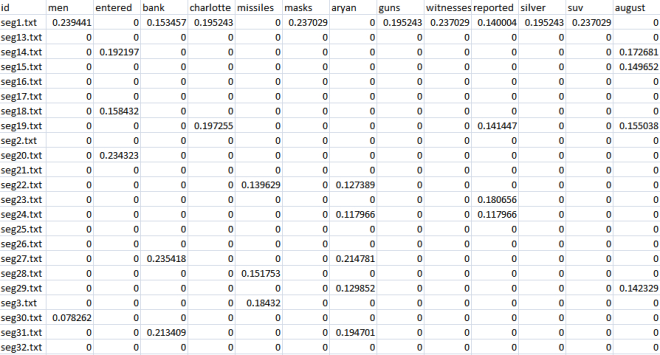

### Дистрибутивная гипотеза

Лингвистические единицы, встречающиеся в схожих контекстах, имеют близкие значения.


Следуя гипотезе, если взять большой набор данных и посчитать tf-idf матрицу для всех слов и документов, то полученные вектора будут представлять семантический смысл слов в многомерном пространстве.

Это многомерное пространство имеет слишком много измерений, но к счастью, мы можем применить Сингулярное разложение (Singular Value Devomposition, SVD) для отбора наиболее важных измерений.

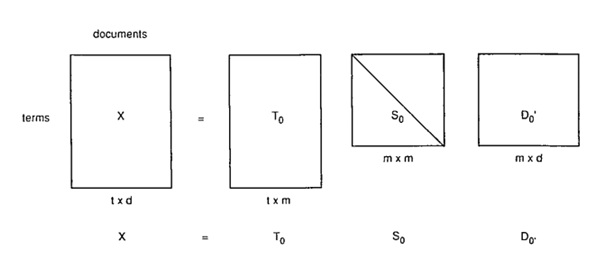

In [ ]:
nltk.download("reuters")

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import reuters

def simple_preprocess(s):
    s = re.sub(r"[^a-z]+", " ", s.lower())
    s = re.sub(r"\s{2,}", " ", s)
    return s.strip()

corpus = [simple_preprocess(" ".join(reuters.words(f))) for f in reuters.fileids()]
len(corpus)

10788

In [ ]:
corpus[0]

'asian exporters fear damage from u s japan rift mounting trade friction between the u s and japan has raised fears among many of asia s exporting nations that the row could inflict far reaching economic damage businessmen and officials said they told reuter correspondents in asian capitals a u s move against japan might boost protectionist sentiment in the u s and lead to curbs on american imports of their products but some exporters said that while the conflict would hurt them in the long run in the short term tokyo s loss might be their gain the u s has said it will impose mln dlrs of tariffs on imports of japanese electronics goods on april in retaliation for japan s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost unofficial japanese estimates put the impact of the tariffs at billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes we wouldn t be able to do business sa

In [ ]:
corpus[7][:100]

'sri lanka gets usda approval for wheat price food department officials said the u s department of ag'

In [ ]:
words = set(w.lower() for d in corpus for w in d.split())
len(words)

29187

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.shape

(10788, 29161)

In [ ]:
len(vectorizer.vocabulary_)

29161

In [ ]:
{w for w in words if w not in vectorizer.vocabulary_}

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [ ]:
print(vectorizer.vocabulary_["king"])
print(vectorizer.vocabulary_["queen"])
print(vectorizer.vocabulary_["wolf"])
print(vectorizer.vocabulary_["dog"])

14229
20754
28767
7685


In [ ]:
vector = X.T[vectorizer.vocabulary_["king"]]
vector

<1x10788 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Column format>

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
X_svd = svd.fit_transform(X.T)
X_svd.shape

(29161, 50)

In [ ]:
from scipy.spatial import distance

def get_embedding(word):
    return X_svd[vectorizer.vocabulary_[word]]

print(distance.euclidean(get_embedding("king"), get_embedding("queen")))
print(distance.euclidean(get_embedding("hair"), get_embedding("queen")))
print(distance.euclidean(get_embedding("book"), get_embedding("queen")))
print(distance.euclidean(get_embedding("hair"), get_embedding("book")))

0.06861685043414627
0.0205948770989939
0.06771907958101814
0.06877604549449676


In [ ]:
print(distance.euclidean(get_embedding("wolf"), get_embedding("book")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("dog")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("hare")))

0.07327887911986691
0.026461172237673407
0.02695527772570916


In [ ]:
print(distance.euclidean(get_embedding("wolf"), get_embedding("queen")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("king")))

# get_embedding("king") - get_embedding("boy") + get_embedding("girl") = get_embedding("queen")

0.03179426146588473
0.07603646088598133


[Латентно-семантический_анализ](https://ru.wikipedia.org/wiki/Латентно-семантический_анализ)

## LDA

Латентное размещение Дирихле (Latent Dirichlet Allocation) — это вероятностная модель, используемая для тематического моделирования при обработке естественного языка. Предполагается, что каждый документ представляет собой смесь тем, а каждая тема — это распределение слов.

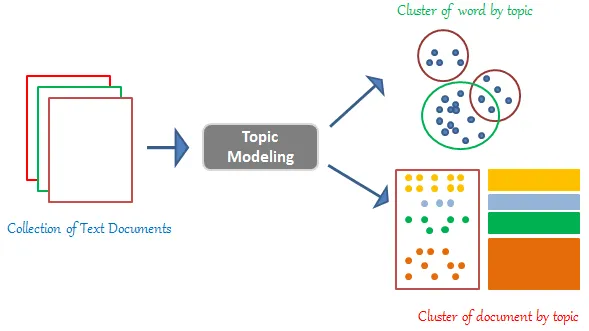

LDA предполагает:

* В документах с похожими темами используются похожие группы слов.
* Скрытые темы можно определить через группы слов, которые часто встречаются вместе в документах.
* Документы представляют собой распределения вероятностей по скрытым темам, что означает, что определенный документ будет содержать больше слов по определенной теме.
* Сами темы - это распределение вероятностей по словам.

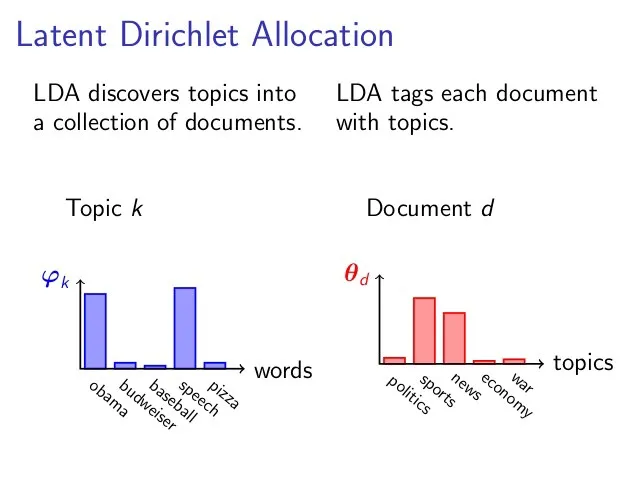

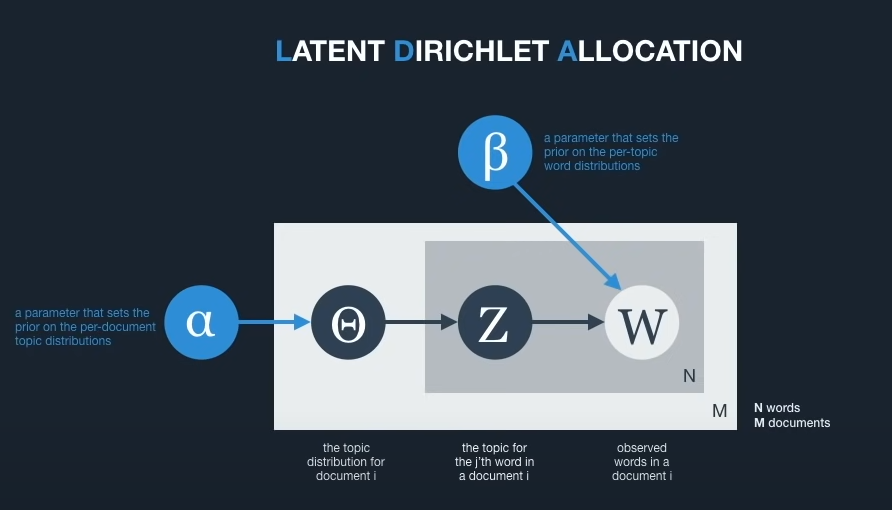

1. Случайным образом назначим каждому слову в каждом документе одну из K тем.
2. Для каждого документа d:
   * Предположим, что верны все назначения кроме текущей темы.
   * Посчитаем два числа:
     1. Долю слов в документе d, которые сейчас относятся к теме t = p(тема t | документ d)
     2. Долю слова w среди всех слов документов, относящихся к теме t = p(слово w | тема t)
   * Перемножаем доли для всех тем и назначаем слову w тему на основе полученной вероятности, используя семплирование по Гиббсу.
3. В конце концов алгоритм сойдется к более-менее оптимальным распределениям.

Параметры модели
* Альфа — это параметр априорной концентрации Дирихле, который представляет собой плотность тем документа — с более высоким значением альфы предполагается, что документы состоят из большего количества тем, что приводит к более детальному распределению документа по темам.

* Бета — это параметр априорной концентрации, который представляет собой плотность тематических слов — с более высоким значением беты предполагается, что темы состоят из большинства слов, что приводит к более детальному распределению темы по словам.

In [ ]:
import nltk
from nltk.corpus import brown


nltk.download("brown")

corpus = [" ".join(brown.words(file_id)) for file_id in brown.fileids()]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=7, topic_word_prior=0.05)
lda.fit(tfidf)

LatentDirichletAllocation(n_components=7, topic_word_prior=0.05)

In [ ]:
# Print top 15 words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-16:-1]]))
    print()

Topic #0:
new state world year american states president great united 000 government social public program john

Topic #1:
vocational roberts hanover alex pike japan dartmouth gavin football krim pa haney mickey oct woodruff

Topic #2:
rayburn linda library mama roy prokofieff atom gorton fromm trevelyan maggie palfrey patent spencer patchen

Topic #3:
countries values data basic population programs progress changes management principle assistance corporation capital artists stations

Topic #4:
said man like af time did mrs just old way little men house long know

Topic #5:
churches universe felix legislature rector marketing catholics carl helva detective folklore tilghman widely hal feed

Topic #6:
music form art society self age play spirit center stage police story southern negro boys



In [ ]:
# Print topics for a sample document
doc_num = 101
print("Sample Document:\n", corpus[doc_num])
print("\nTopics for Sample Document:\n")
for index in lda.transform(tfidf[doc_num])[0].argsort()[-3:]:
    print("Topic #%d" % index)

Sample Document:
 To what extent and in what ways did Christianity affect the United States of America in the nineteenth century ? ? How far and in what fashion did it modify the new nation which was emerging in the midst of the forces shaping the revolutionary age ? ? To what extent did it mould the morals and the social , economic , and political life and institutions of the country ? ? A complete picture is impossible -- partly because of the limitations of space , partly because for millions of individuals who professed allegiance to the Christian faith data are unobtainable . Even more of an obstacle is the difficulty of separating the influence of Christianity from other factors . Although a complete picture cannot be given , we can indicate some aspects of life into which the Christian faith entered as at least one creative factor . At times we can say that it was the major factor . What in some ways was the most important aspect was the impact individually on the millions who c